In [1]:
%matplotlib inline
import tables
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import math
import random
from scipy import ndimage
import lmdb

In [2]:
THRESOLD = 0.9
case_res = {}
with open('pred_label_all.csv') as f:
    for line in f:
        sample, prob1, prob2 = line.split(',')
        case, x,y,z = sample.split('_')
        if float(prob2)>THRESOLD:
            ls = [case, prob2,x,y,z]
            if case not in case_res:
                case_res[case] = [ls]
            else:
                case_res[case].append(ls)

In [3]:
case_res

{'p1': [['p1', ' 0.970187\n', '164', '128', '384'],
  ['p1', ' 0.909666\n', '168', '124', '384'],
  ['p1', ' 0.937092\n', '268', '260', '448'],
  ['p1', ' 0.984062\n', '312', '360', '116'],
  ['p1', ' 0.969774\n', '312', '360', '120'],
  ['p1', ' 0.973277\n', '324', '344', '132'],
  ['p1', ' 0.924385\n', '344', '84', '184']],
 'p2': [['p2', ' 0.946877\n', '284', '196', '164'],
  ['p2', ' 0.948212\n', '284', '200', '160'],
  ['p2', ' 0.953566\n', '284', '200', '164'],
  ['p2', ' 0.969322\n', '284', '204', '168'],
  ['p2', ' 0.922786\n', '288', '196', '164'],
  ['p2', ' 0.975850\n', '288', '200', '152'],
  ['p2', ' 0.981726\n', '288', '200', '156'],
  ['p2', ' 0.919494\n', '288', '200', '164'],
  ['p2', ' 0.901129\n', '288', '200', '168'],
  ['p2', ' 0.939537\n', '292', '192', '160'],
  ['p2', ' 0.935971\n', '292', '192', '164'],
  ['p2', ' 0.971986\n', '292', '196', '156']],
 'p3': [['p3', ' 0.932551\n', '316', '384', '212'],
  ['p3', ' 0.980511\n', '340', '196', '208'],
  ['p3', ' 0.94

In [ ]:
#############################################################################
# IMPORTANT                                                                 #
# For different image viewers, the x, y coordinates may need to be swapped. #
#############################################################################

======p1======
0.109027981325
(471, 429, 429)
(132, 512, 512)
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
164 128 384
2.Rounded coordinates of original image:
196.0 153.0 108.0
['p1', ' 0.970187\n', '164', '128', '384']
-------------------------
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
168 124 384
2.Rounded coordinates of original image:
201.0 148.0 108.0
['p1', ' 0.909666\n', '168', '124', '384']
-------------------------
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
268 260 448
2.Rounded coordinates of original image:
320.0 310.0 126.0
['p1', ' 0.937092\n', '268', '260', '448']
-------------------------
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
312 360 116
2.Rounded coordinates of original image:
372.0 430.0 33.0
['p1', ' 0.984062\n', '312', '360', '116']
-------------------------
Cen

0.0802888745597
(450, 514, 514)
(126, 512, 512)
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
156 332 364
2.Rounded coordinates of original image:
155.0 331.0 102.0
['p5', ' 0.963452\n', '156', '332', '364']
-------------------------
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
160 336 364
2.Rounded coordinates of original image:
159.0 335.0 102.0
['p5', ' 0.957587\n', '160', '336', '364']
-------------------------
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
164 320 364
2.Rounded coordinates of original image:
163.0 319.0 102.0
['p5', ' 0.929776\n', '164', '320', '364']
-------------------------
Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
168 324 364
2.Rounded coordinates of original image:
167.0 323.0 102.0
['p5', ' 0.910890\n', '168', '324', '364']
-------------------------
Center of 41*41*

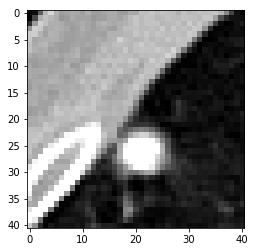

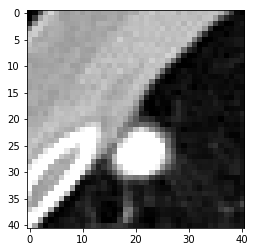

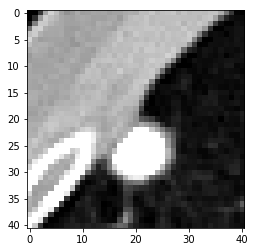

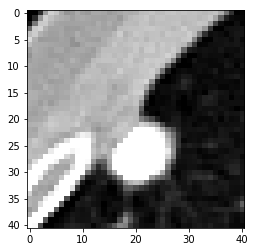

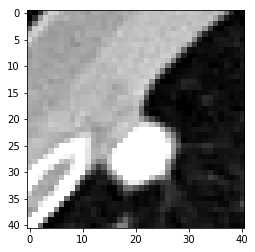

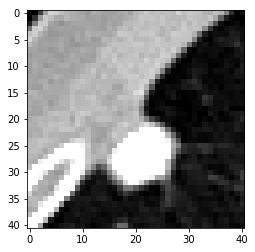

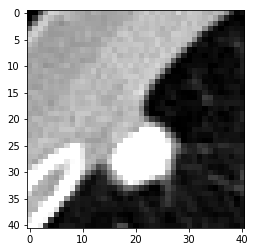

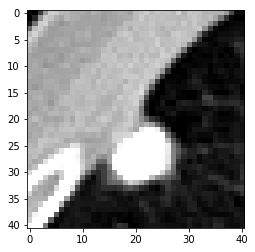

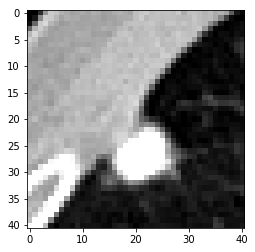

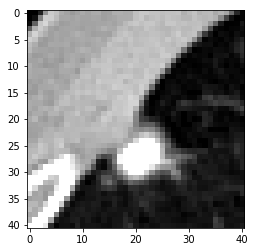

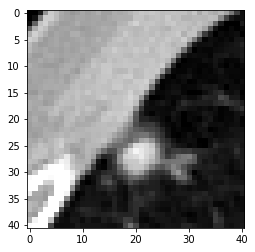

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
128 80 144
2.Rounded coordinates of original image:
153.0 95.0 50.0
['p6', ' 0.979232\n', '128', '80', '144']
-------------------------


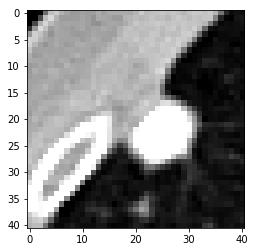

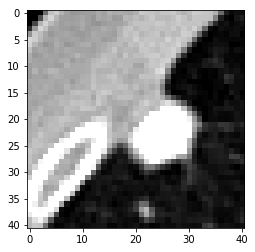

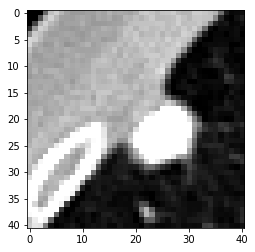

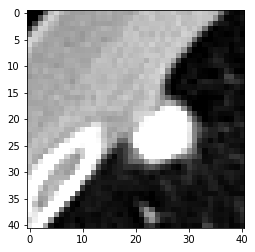

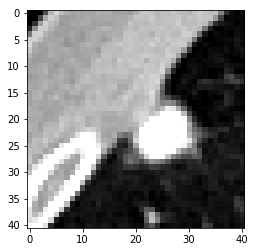

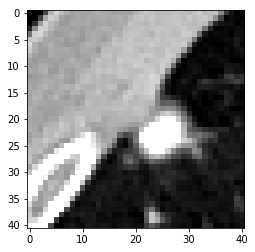

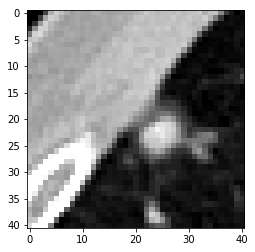

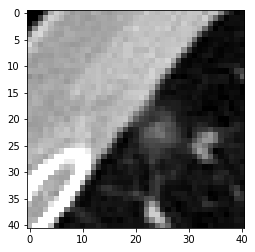

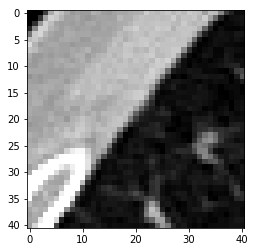

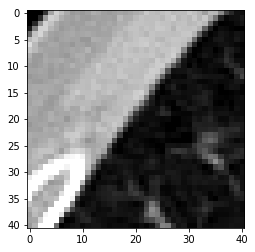

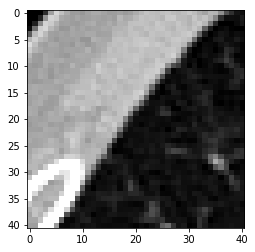

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
128 84 136
2.Rounded coordinates of original image:
153.0 100.0 48.0
['p6', ' 0.999958\n', '128', '84', '136']
-------------------------


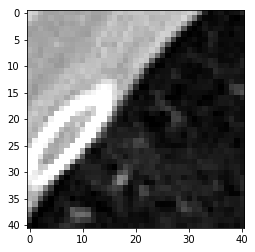

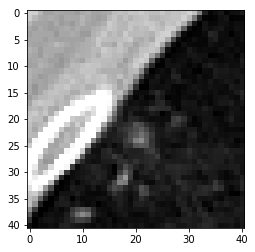

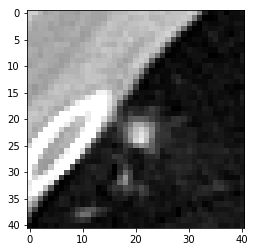

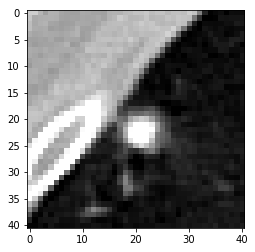

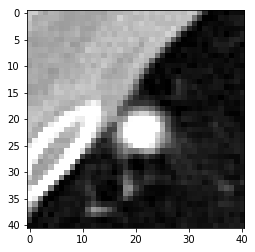

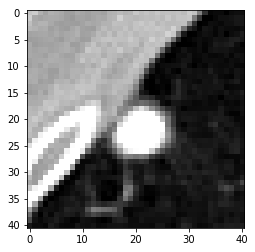

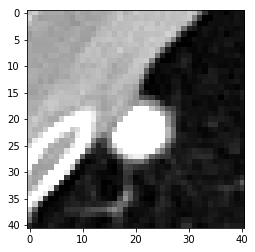

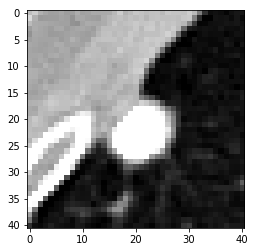

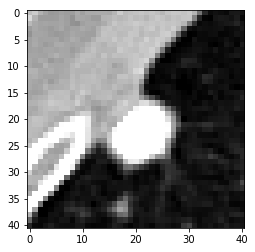

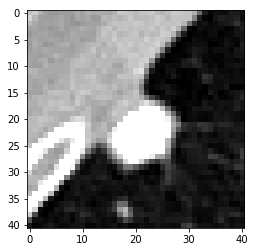

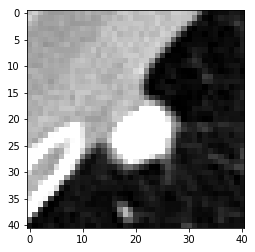

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
128 84 140
2.Rounded coordinates of original image:
153.0 100.0 49.0
['p6', ' 0.999875\n', '128', '84', '140']
-------------------------


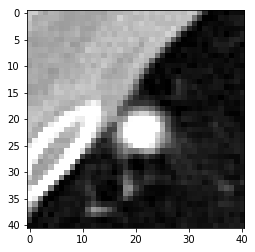

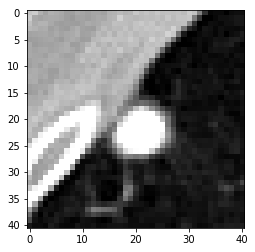

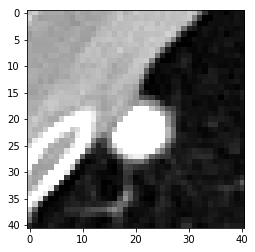

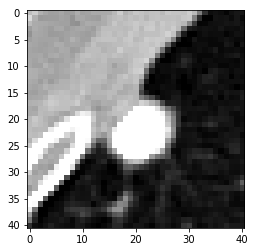

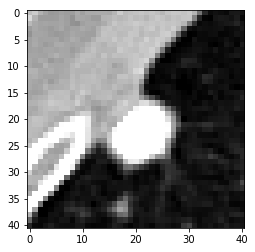

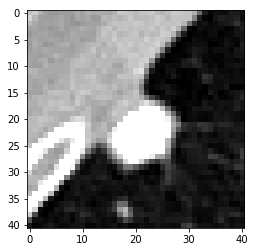

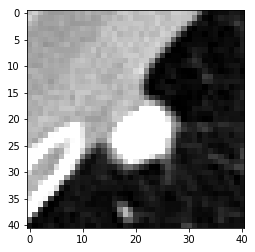

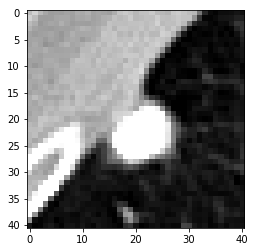

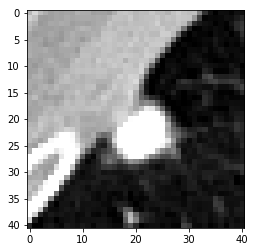

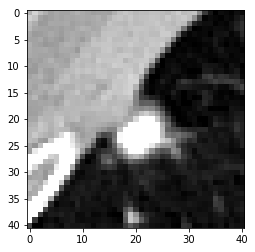

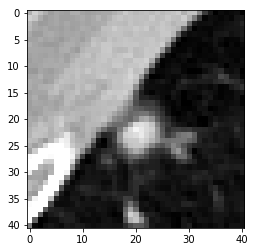

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
128 84 144
2.Rounded coordinates of original image:
153.0 100.0 50.0
['p6', ' 0.991892\n', '128', '84', '144']
-------------------------


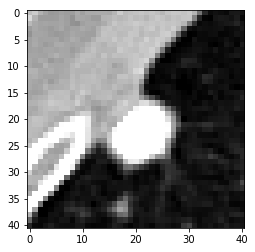

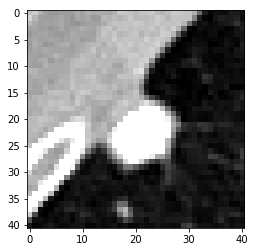

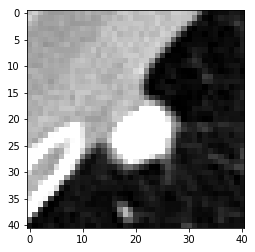

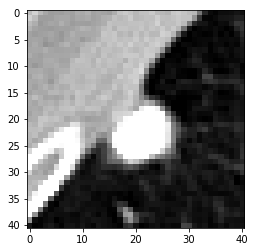

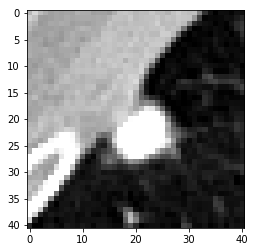

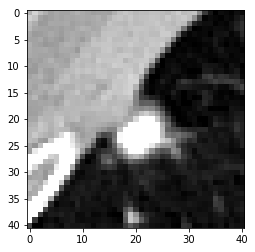

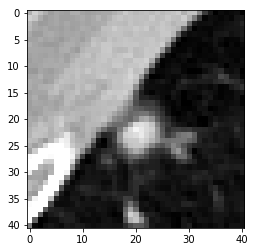

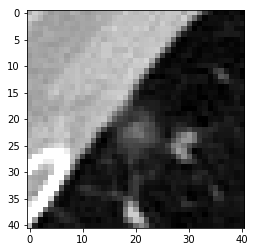

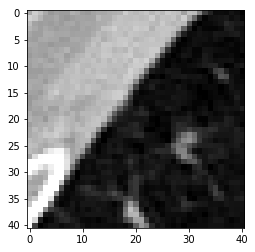

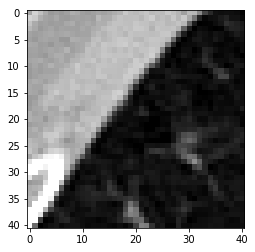

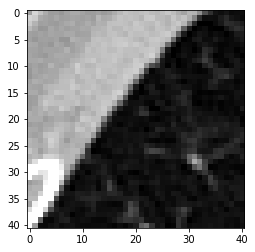

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
128 88 136
2.Rounded coordinates of original image:
153.0 105.0 48.0
['p6', ' 0.999949\n', '128', '88', '136']
-------------------------


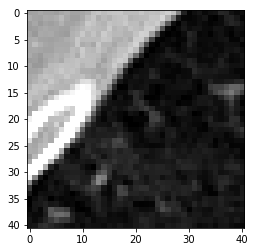

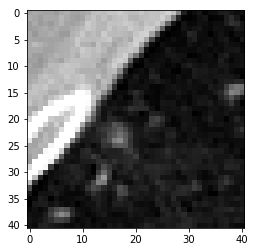

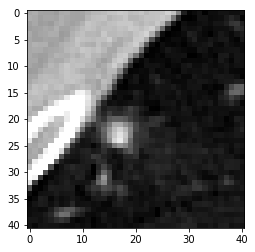

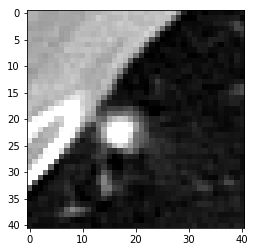

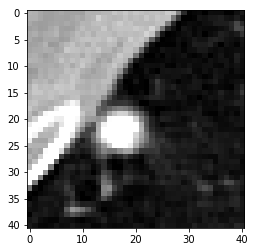

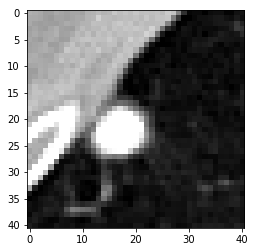

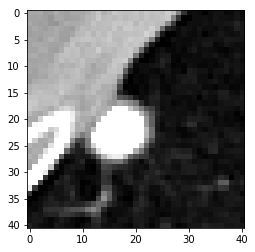

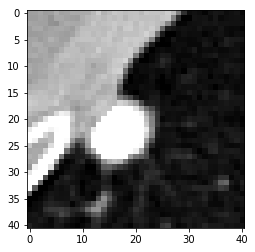

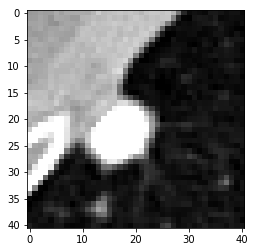

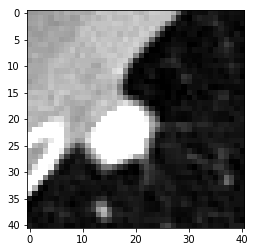

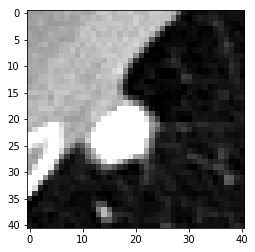

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
128 88 140
2.Rounded coordinates of original image:
153.0 105.0 49.0
['p6', ' 0.999881\n', '128', '88', '140']
-------------------------


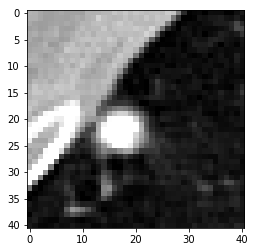

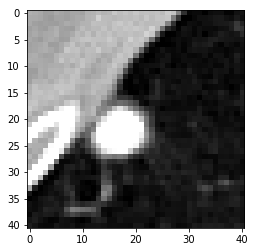

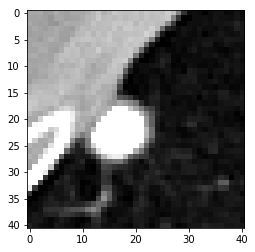

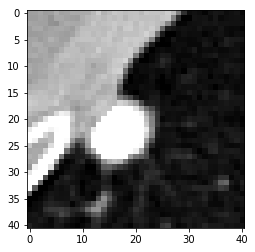

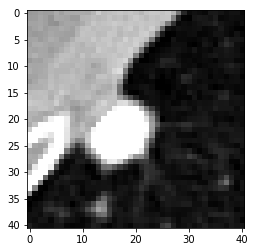

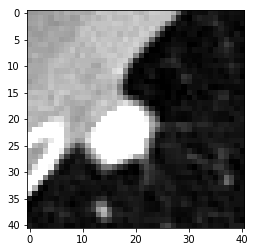

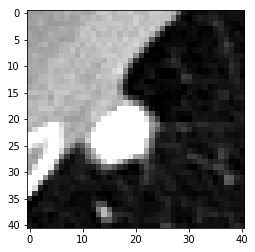

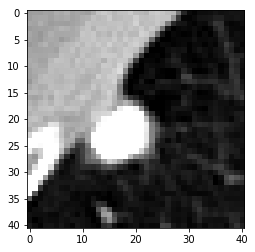

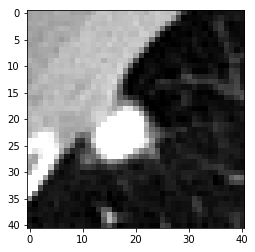

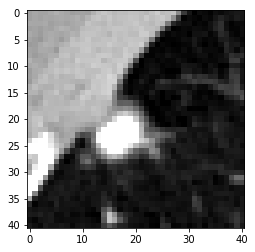

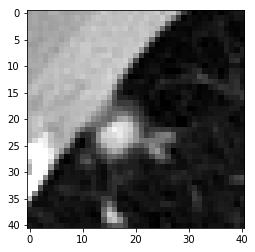

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 80 140
2.Rounded coordinates of original image:
158.0 95.0 49.0
['p6', ' 0.999087\n', '132', '80', '140']
-------------------------


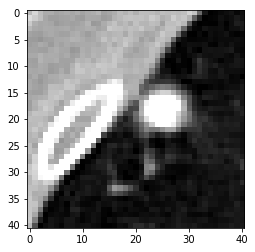

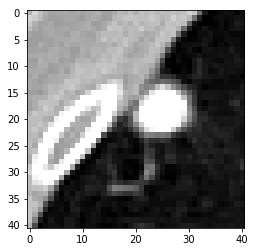

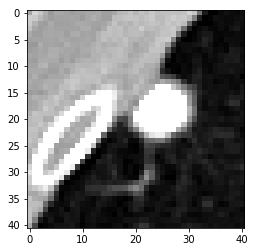

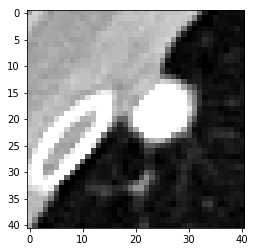

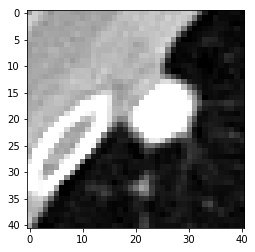

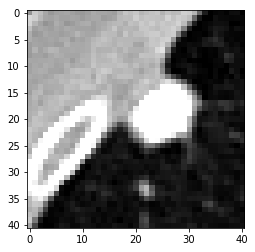

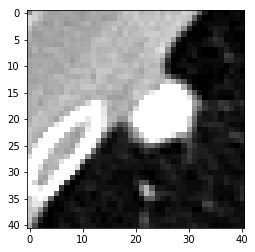

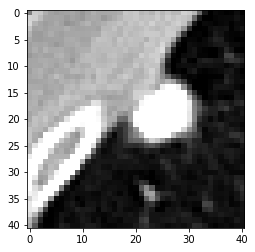

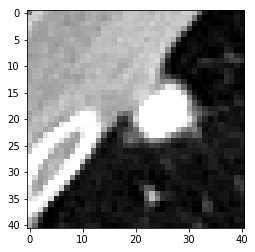

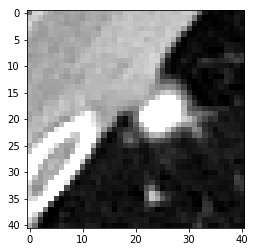

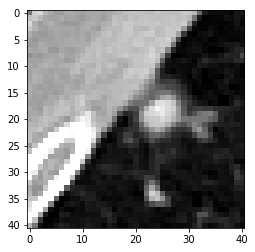

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 84 136
2.Rounded coordinates of original image:
158.0 100.0 48.0
['p6', ' 0.999931\n', '132', '84', '136']
-------------------------


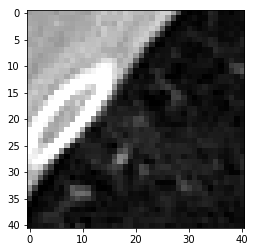

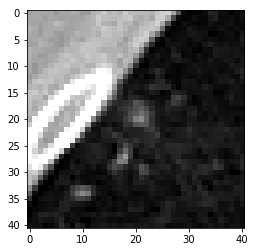

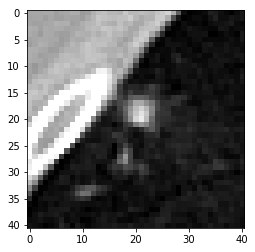

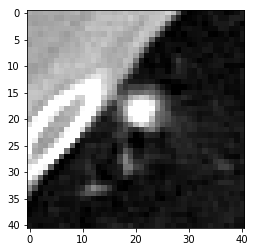

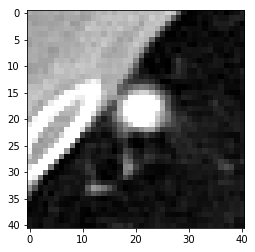

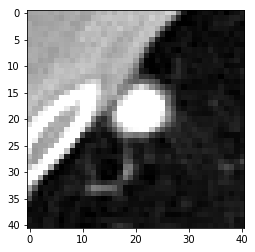

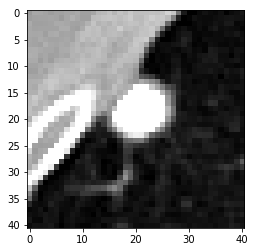

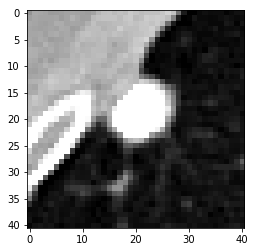

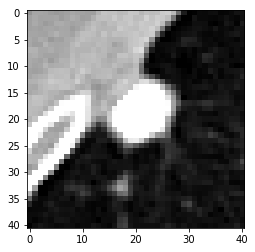

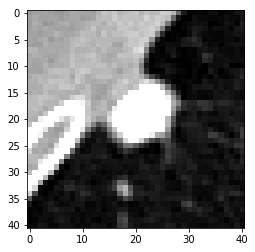

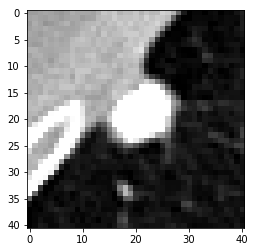

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 84 140
2.Rounded coordinates of original image:
158.0 100.0 49.0
['p6', ' 0.999845\n', '132', '84', '140']
-------------------------


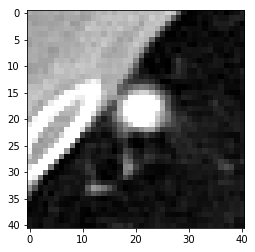

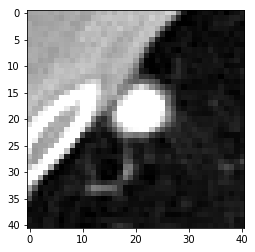

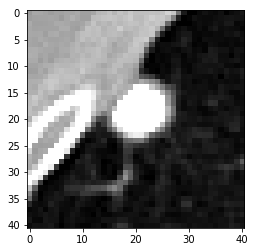

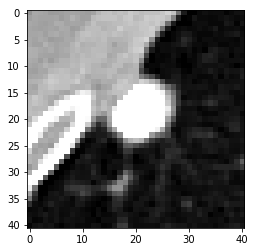

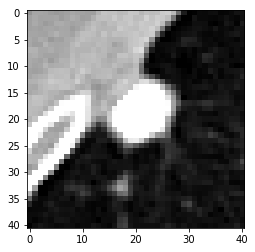

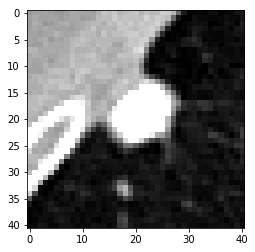

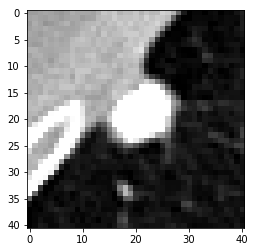

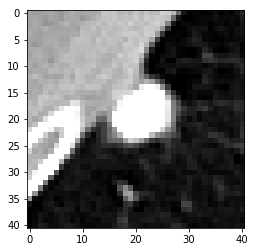

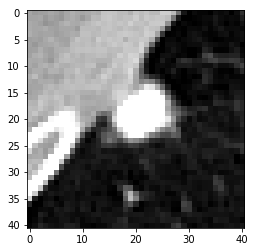

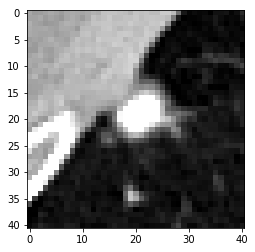

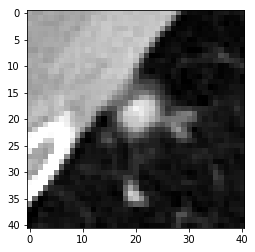

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 84 144
2.Rounded coordinates of original image:
158.0 100.0 50.0
['p6', ' 0.996458\n', '132', '84', '144']
-------------------------


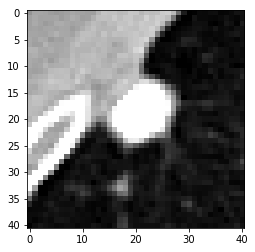

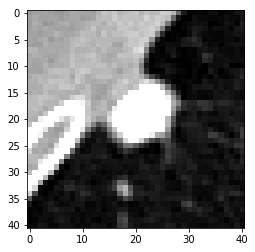

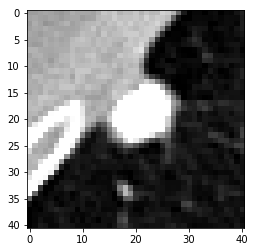

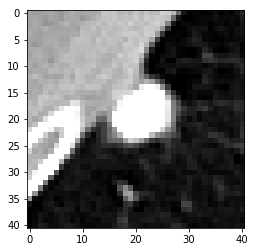

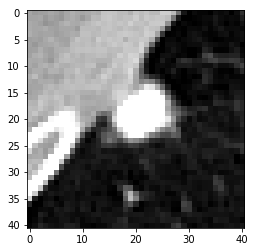

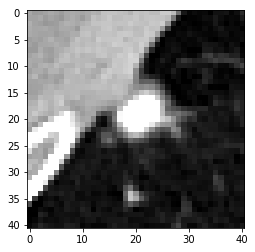

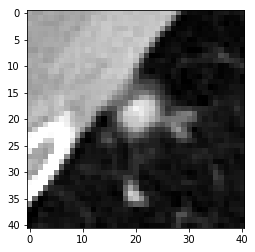

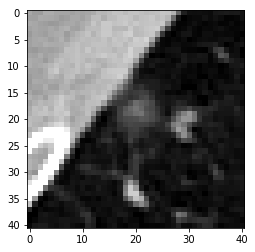

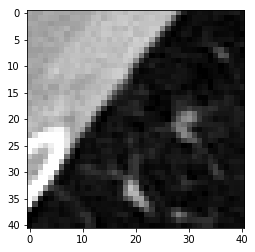

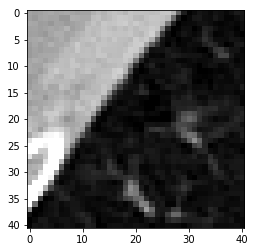

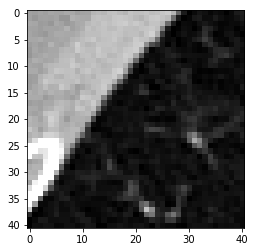

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 88 136
2.Rounded coordinates of original image:
158.0 105.0 48.0
['p6', ' 0.999960\n', '132', '88', '136']
-------------------------


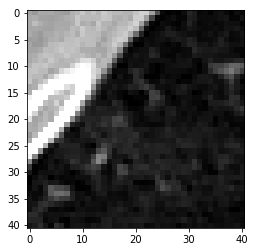

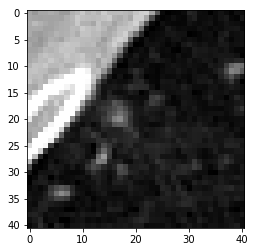

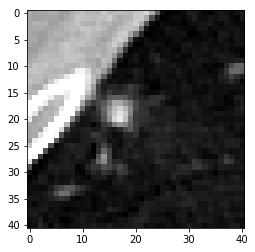

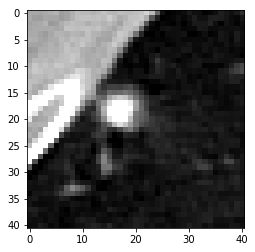

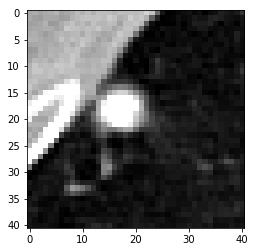

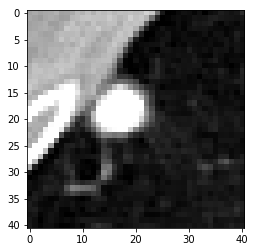

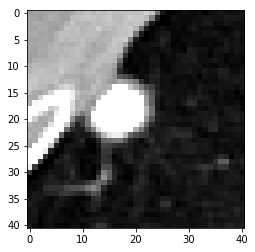

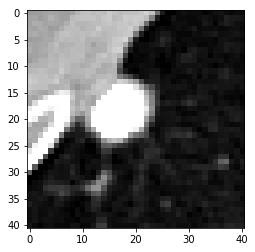

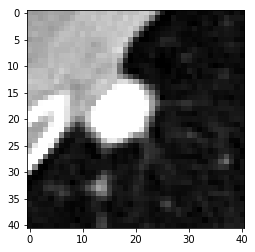

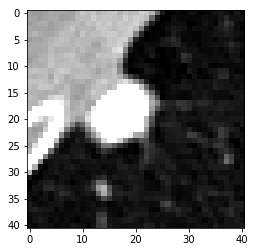

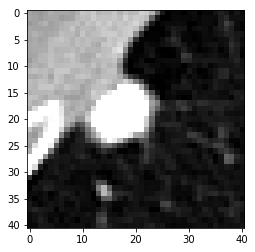

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 88 140
2.Rounded coordinates of original image:
158.0 105.0 49.0
['p6', ' 0.999897\n', '132', '88', '140']
-------------------------


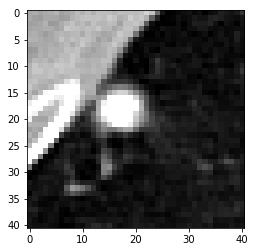

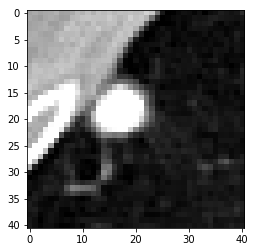

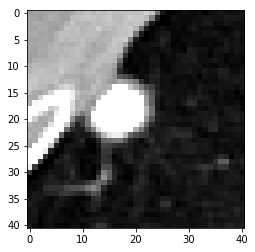

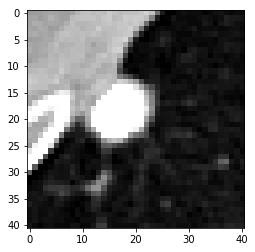

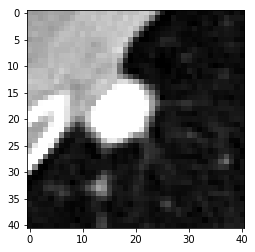

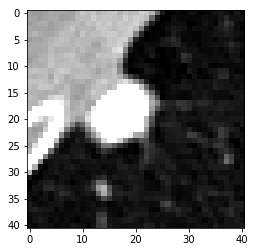

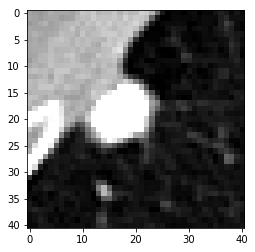

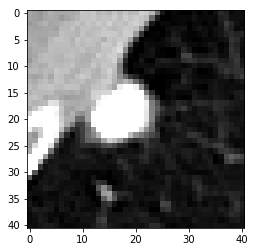

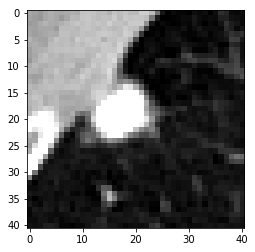

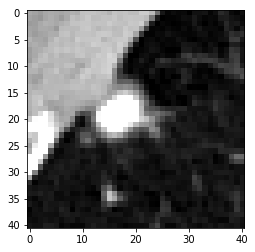

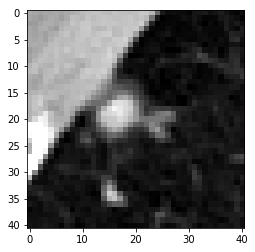

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
132 88 144
2.Rounded coordinates of original image:
158.0 105.0 50.0
['p6', ' 0.996800\n', '132', '88', '144']
-------------------------


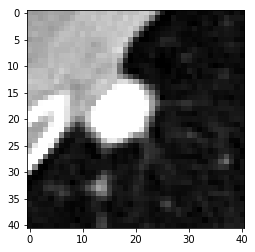

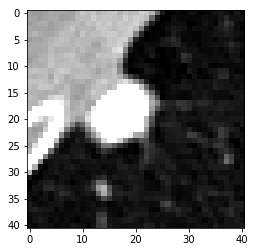

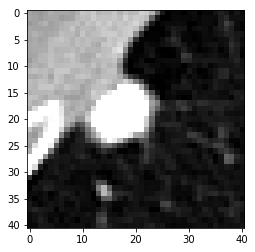

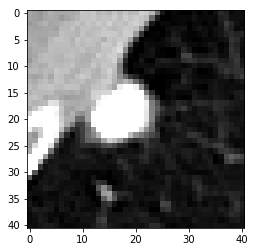

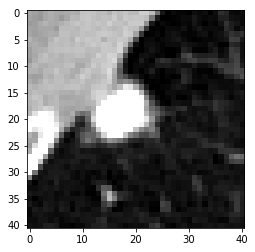

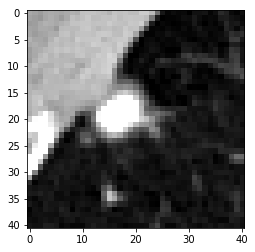

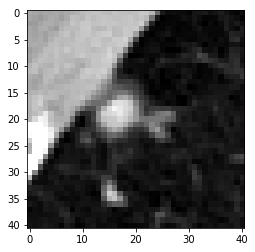

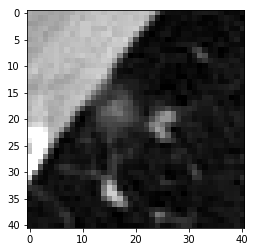

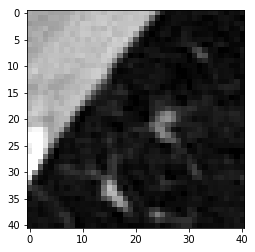

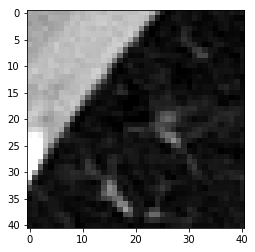

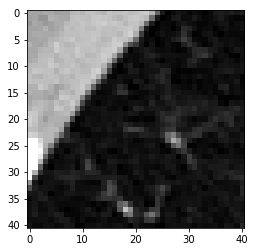

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
180 392 260
2.Rounded coordinates of original image:
215.0 468.0 91.0
['p6', ' 0.968449\n', '180', '392', '260']
-------------------------


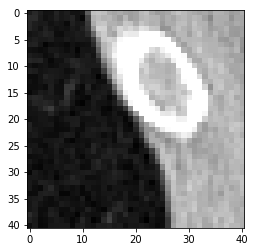

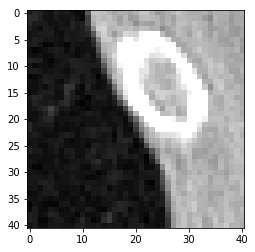

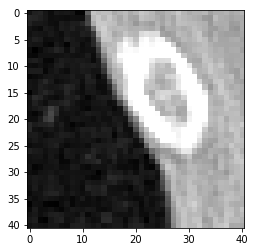

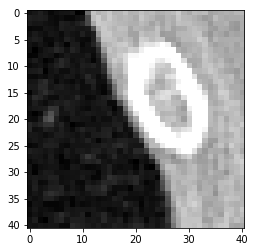

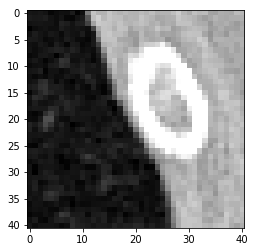

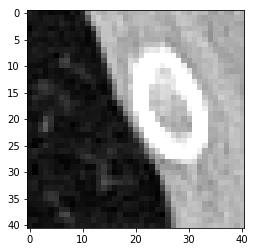

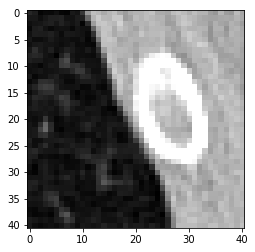

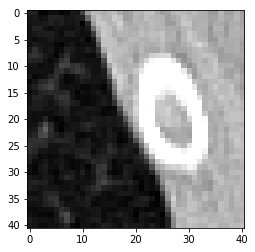

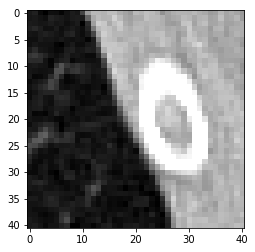

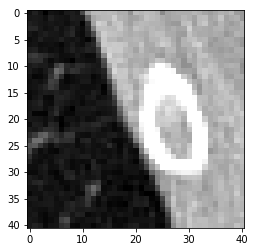

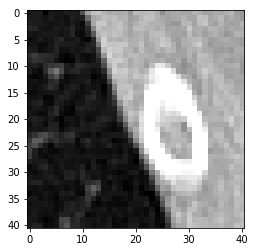

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
252 164 352
2.Rounded coordinates of original image:
301.0 196.0 123.0
['p6', ' 0.971814\n', '252', '164', '352']
-------------------------


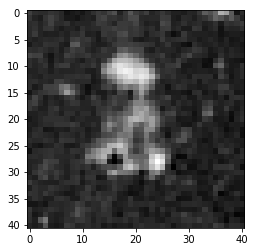

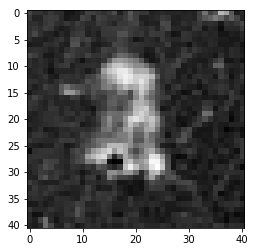

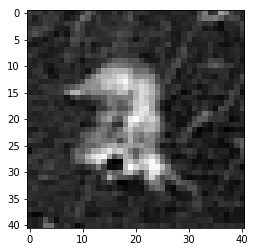

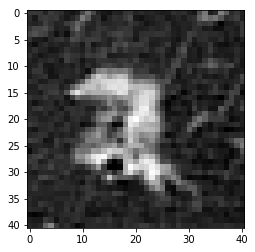

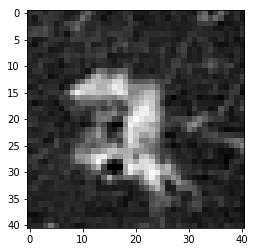

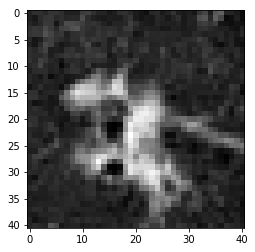

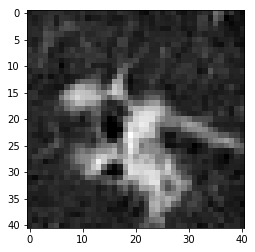

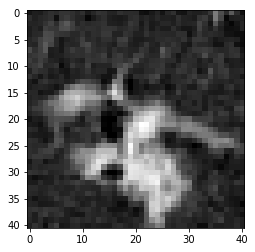

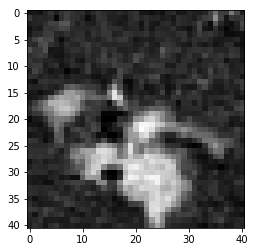

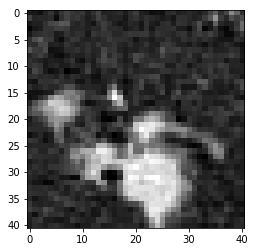

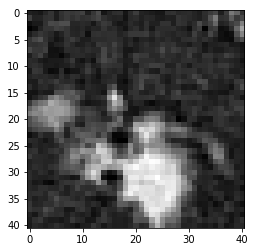

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
256 100 400
2.Rounded coordinates of original image:
306.0 119.0 140.0
['p6', ' 0.901269\n', '256', '100', '400']
-------------------------


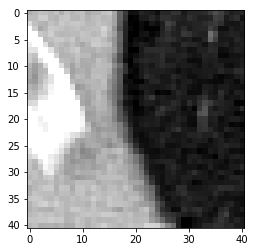

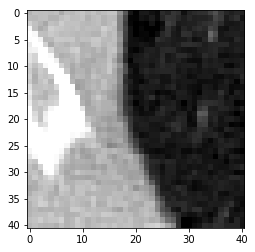

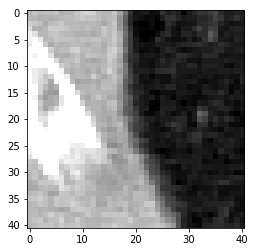

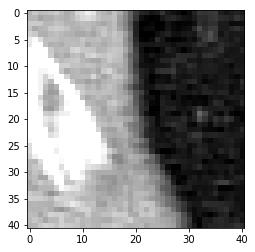

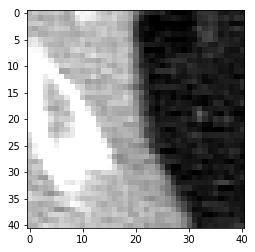

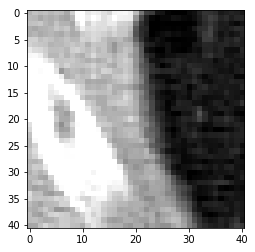

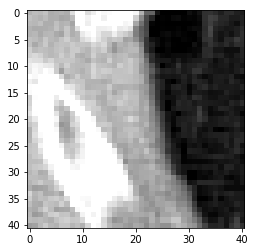

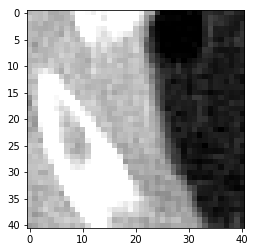

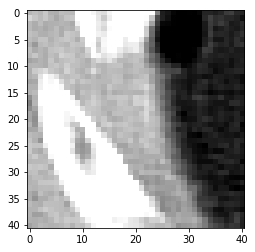

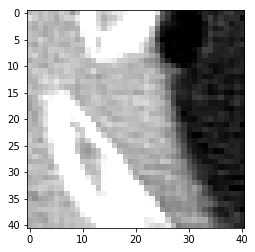

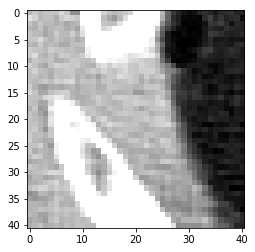

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
256 164 352
2.Rounded coordinates of original image:
306.0 196.0 123.0
['p6', ' 0.995269\n', '256', '164', '352']
-------------------------


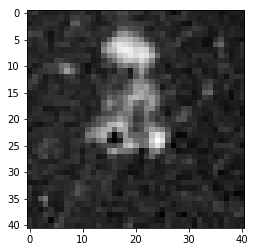

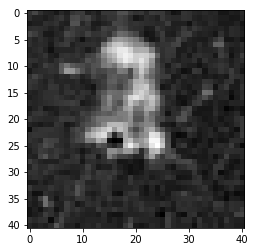

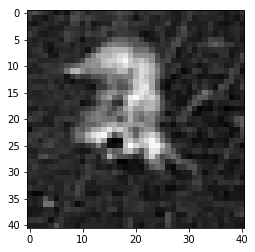

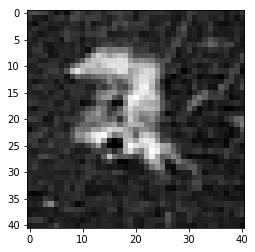

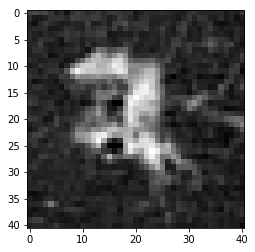

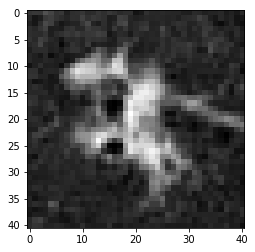

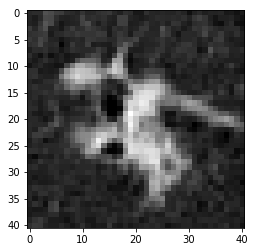

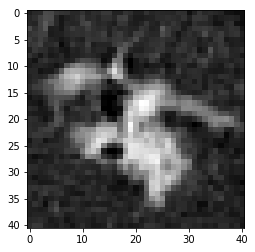

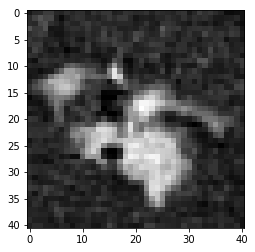

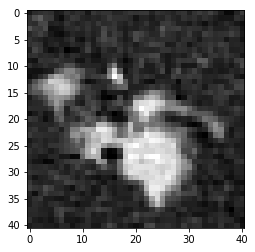

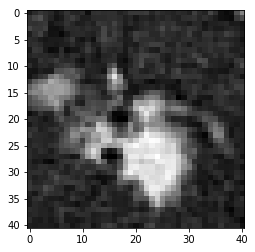

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
260 164 356
2.Rounded coordinates of original image:
310.0 196.0 125.0
['p6', ' 0.998501\n', '260', '164', '356']
-------------------------


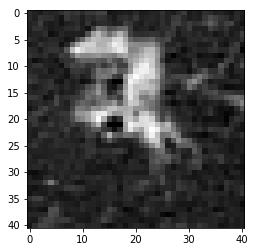

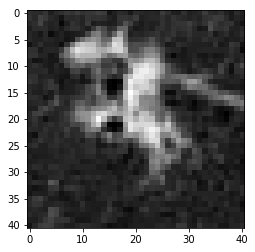

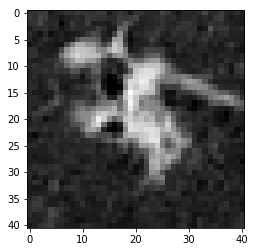

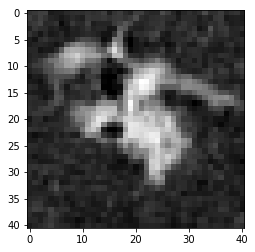

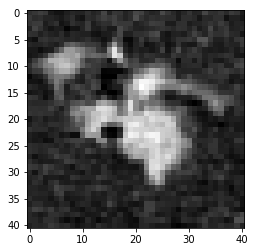

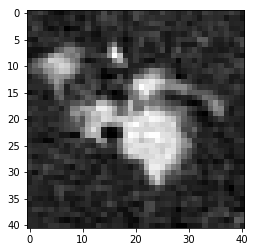

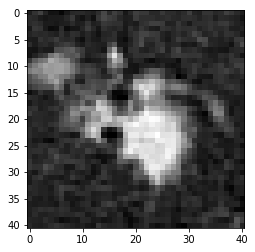

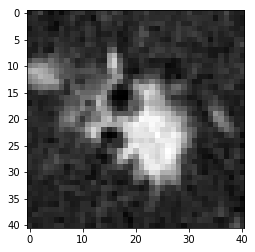

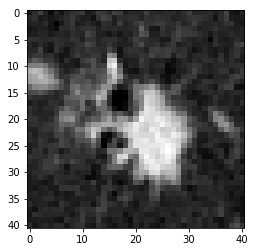

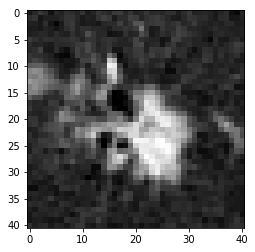

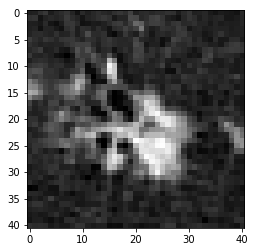

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
260 168 356
2.Rounded coordinates of original image:
310.0 201.0 125.0
['p6', ' 0.998741\n', '260', '168', '356']
-------------------------


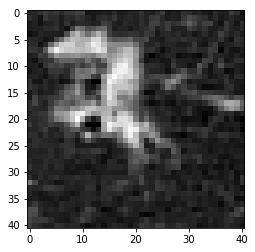

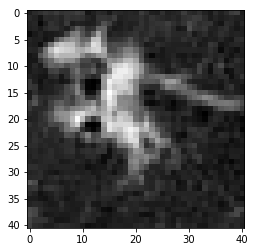

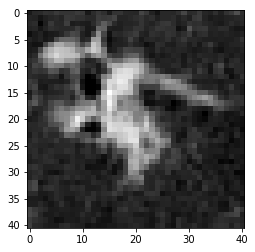

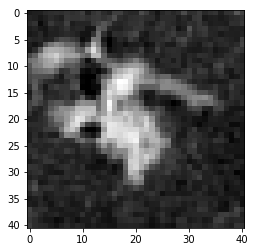

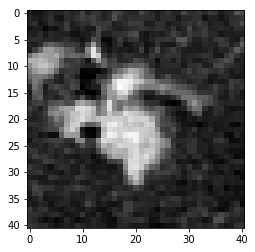

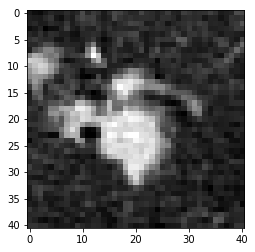

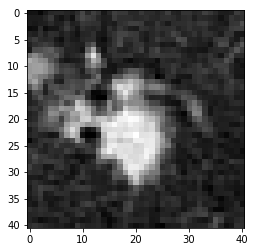

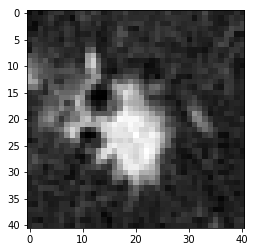

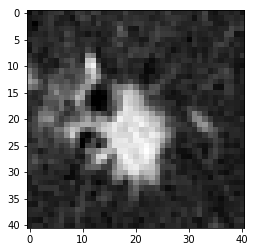

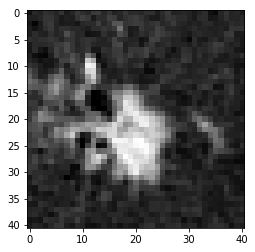

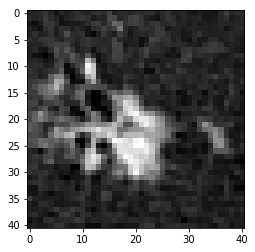

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
260 168 360
2.Rounded coordinates of original image:
310.0 201.0 126.0
['p6', ' 0.998517\n', '260', '168', '360']
-------------------------


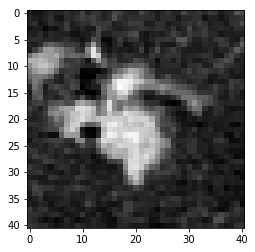

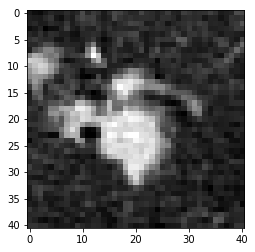

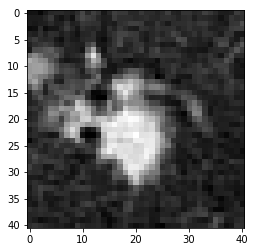

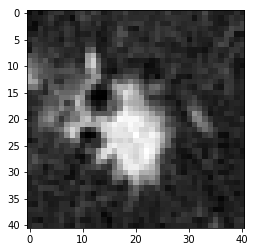

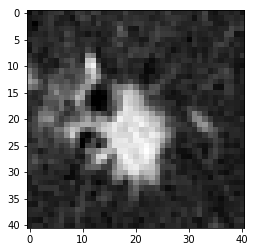

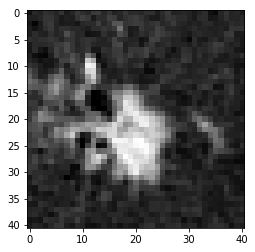

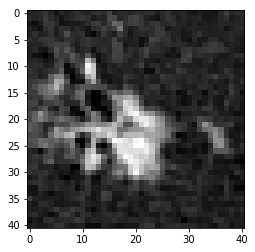

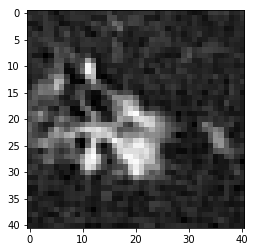

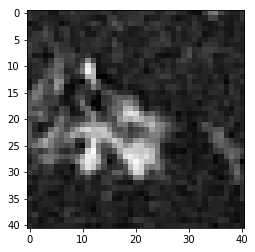

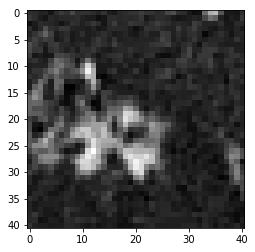

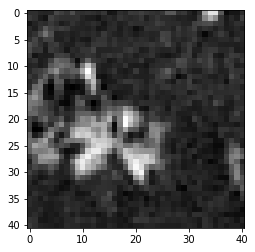

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
264 164 356
2.Rounded coordinates of original image:
315.0 196.0 125.0
['p6', ' 0.997491\n', '264', '164', '356']
-------------------------


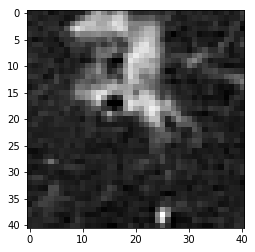

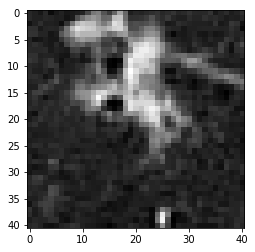

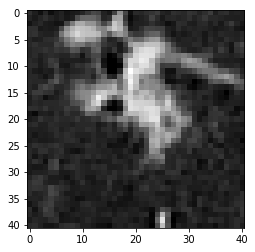

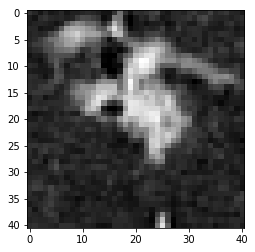

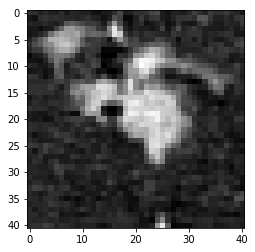

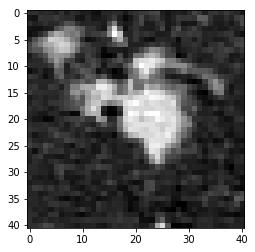

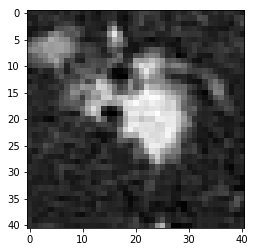

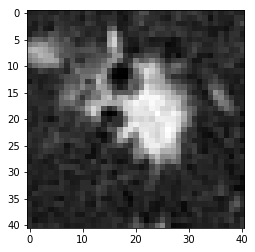

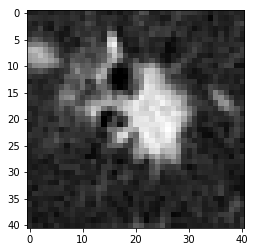

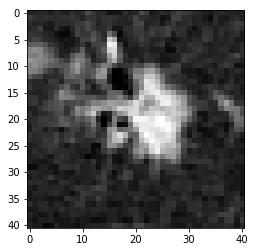

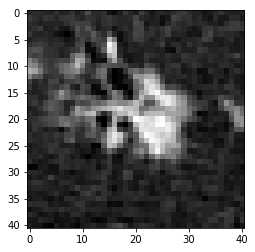

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
264 168 356
2.Rounded coordinates of original image:
315.0 201.0 125.0
['p6', ' 0.996349\n', '264', '168', '356']
-------------------------


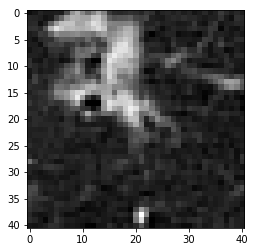

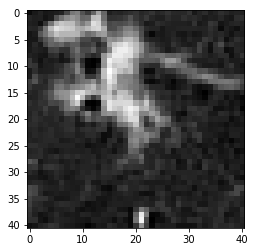

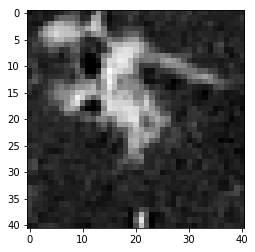

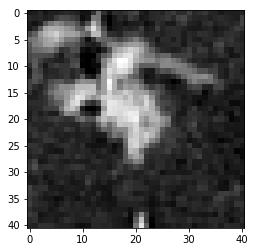

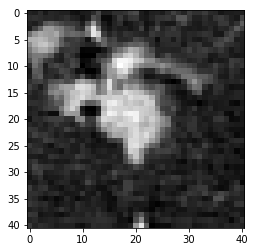

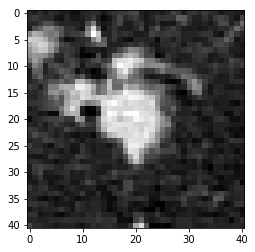

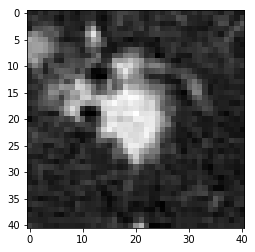

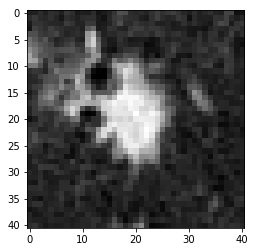

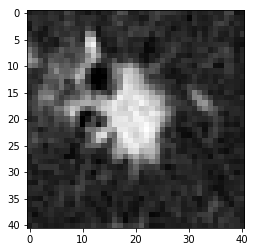

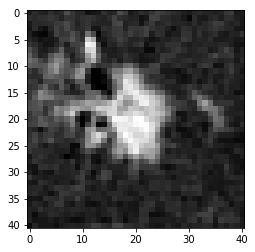

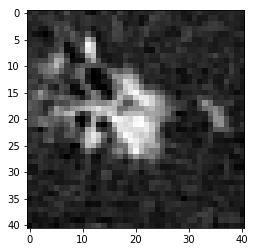

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
264 168 360
2.Rounded coordinates of original image:
315.0 201.0 126.0
['p6', ' 0.995899\n', '264', '168', '360']
-------------------------


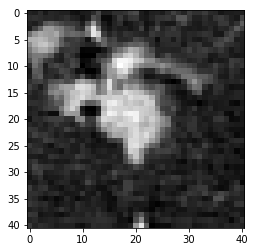

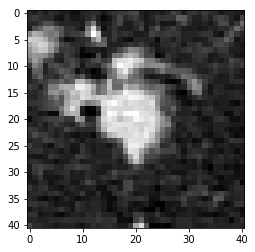

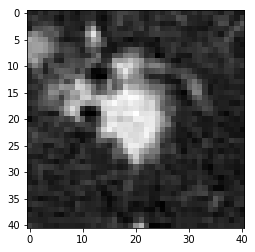

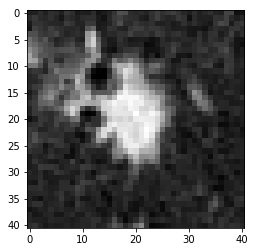

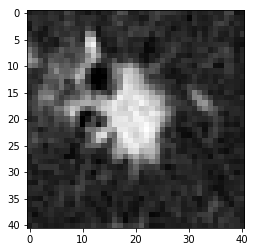

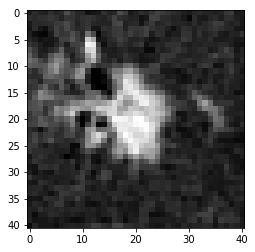

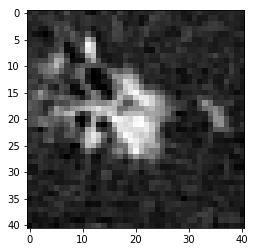

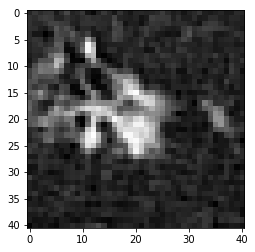

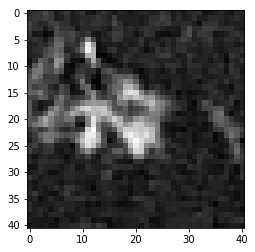

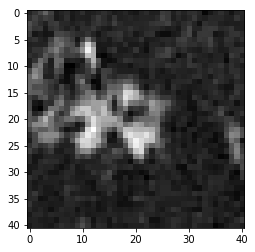

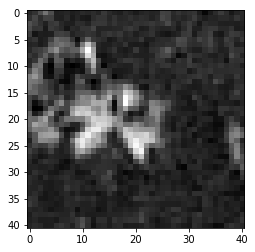

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
268 168 360
2.Rounded coordinates of original image:
320.0 201.0 126.0
['p6', ' 0.996099\n', '268', '168', '360']
-------------------------


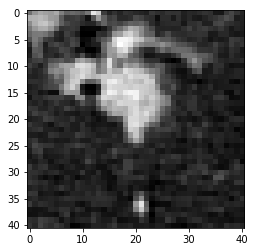

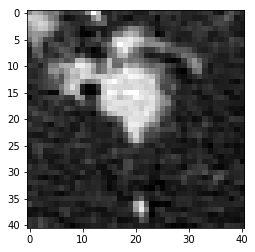

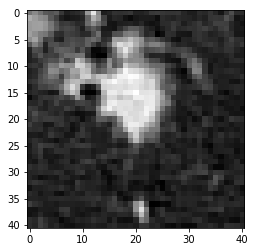

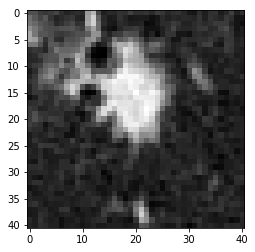

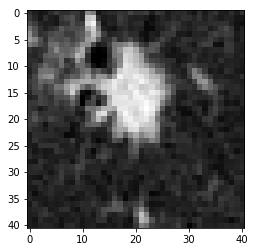

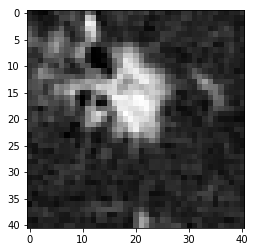

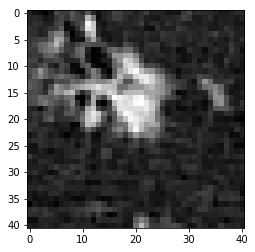

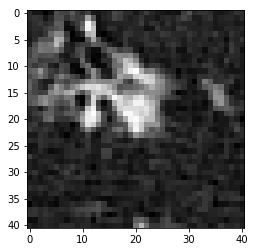

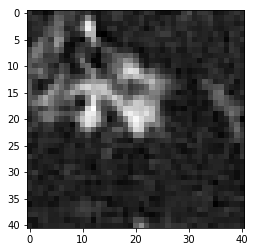

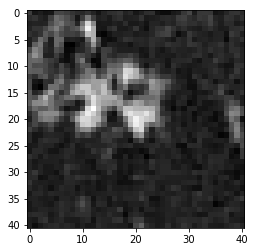

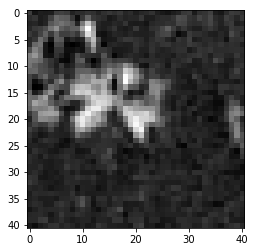

Center of 41*41*41 cube that predicted to contain a nodule:
1.Coordinates of resampled image:
268 168 364
2.Rounded coordinates of original image:
320.0 201.0 127.0
['p6', ' 0.997757\n', '268', '168', '364']
-------------------------


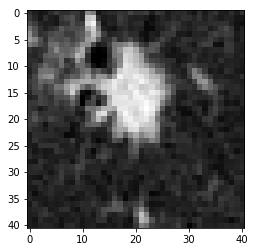

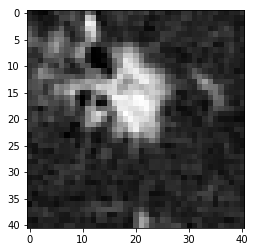

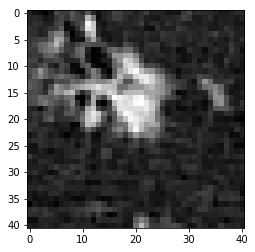

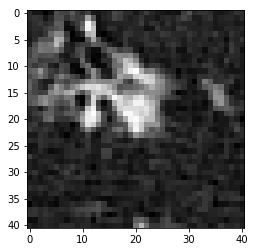

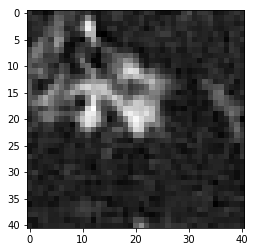

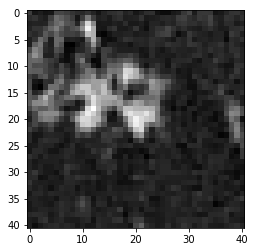

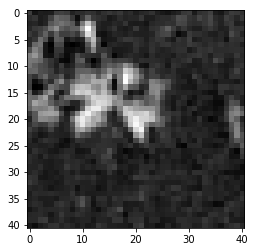

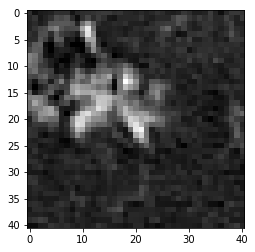

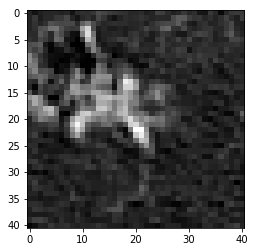

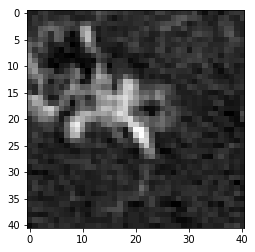

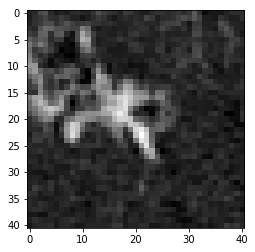

======p7======
0.165200678336
(431, 529, 529)
(151, 512, 512)


In [10]:
# AROUND_CENTER controls number of slices to show
# CASE controls which patient to show
AROUND_CENTER = 5
CASE = 'p6'

PATIENT_FOLDER = 'resampled/'

N_AVG = 9
N_PATCH = 41
N_CHANNEL = 3
N_TRAIN = 1

N_PATCH_HALF = int((N_PATCH - 1)/ 2.0)
N_AVG_HALF = int((N_AVG - 1)/2.0)

Z_STEP = 4
X_STEP = 4
X_DCM = 512
cases = [s.replace('.hdf5', '') for s in os.listdir(PATIENT_FOLDER)
        if s. endswith('.hdf5')]
ncase = 0
cases.sort()
case_ratio = {}

for case in cases:
    print '======' + case + '======'
    hdf5_path = PATIENT_FOLDER + case+'.hdf5'
    hdf5_file = tables.open_file(hdf5_path, mode = 'r')
    img = hdf5_file.root.resampledimg[:]
    lung_mask = hdf5_file.root.lung_mask[:]
    print img.mean()
    print img.shape
    print lung_mask.shape
    z_resample = img.shape[0]
    x_resample = img.shape[1]
    z_ratio = lung_mask.shape[0]/float(z_resample)
    x_ratio = 512.0/float(x_resample)
    if case in case_res:
        res = case_res[case]
        for ls in res:
            x_center = int(ls[2])
            y_center = int(ls[3])
            z_center = int(ls[4])
            print '=========================='
            print 'Center of 41*41*41 cube that predicted to contain a nodule:'
            print '1.Coordinates of resampled image:'
            print x_center, y_center, z_center
            print '2.Rounded coordinates of original image:'
            print round(x_center*x_ratio), round(y_center*x_ratio), round(z_center*z_ratio)
            print ls
            print '-------------------------'
          
            im_sample = img[(z_center - AROUND_CENTER): (z_center + AROUND_CENTER + 1),
                            (x_center - N_PATCH_HALF): (x_center + N_PATCH_HALF + 1),
                            (y_center - N_PATCH_HALF): (y_center + N_PATCH_HALF + 1)]
            if case == CASE:
                for z in range(2*AROUND_CENTER + 1):
                    plt.imshow(im_sample[z,:,:], cmap=plt.cm.gray)
                    plt.show()